<a href="https://colab.research.google.com/github/tinasandu/Teacher-Analysis-Pipelines/blob/main/Data_Aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Aggregation

In this notebook we load in the ratings and aggregate them in multiple ways documented in the report.

## Label processing


In [ ]:
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter

import json

wb = load_workbook(filename='results_08-06.xlsx')
ws = wb.active

my_list = []

last_column = len(list(ws.columns))
last_row = len(list(ws.rows))

for row in range(1, last_row + 1):
    my_dict = {}
    for column in range(1, last_column + 1):
        column_letter = get_column_letter(column)
        if row > 1:
            my_dict[ws[column_letter + str(1)].value] = ws[column_letter + str(row)].value
    my_list.append(my_dict)

data = json.dumps(my_list, sort_keys=True, indent=4)
with open('results.json', 'w', encoding='utf-8') as f:
    f.write(data) 

In [ ]:
NO_PEOPLE = 4
NO_FEATURES = 4
NO_VIDEOS = 7

RATING_INTERVAL= 1

AVG_TIME_PER_VID = 6 * 60 

## Use Videos from app
links=  {
                "video0" : "https://www.youtube.com/watch?v=LNHBMFCzznE",
                "startTime0" : 14.00,
                "endTime0" : 31.0,
                
                # // "video1" : "https://www.youtube.com/watch?v=LNHBMFCzznE",
                # // "feature1" : features[index][0],
                # // "startTime1" : 14.00,
                # // "endTime1" : 5*60.0,
                
                "video1" : "https://www.youtube.com/watch?v=5ejPI6QqKBU",
                "startTime1" : 14 *60. + 2,
                "endTime1" : 18*60. + 54,
                
                # // "video2" : "https://www.youtube.com/watch?v=UNP03fDSj1U",
                # // "feature2" : features[index][1],
                # // "startTime2" : 16.00,
                # // "endTime2" : 3*60.0 + 22,
                
                "video2" : "https://www.youtube.com/watch?v=vFZY--lgmHs",
                "startTime2" : 1*60. + 10,
                "endTime2" : 6*60. + 18,
                
                # // "video3" : "https://www.youtube.com/watch?v=N37x4GgDVBM",
                # // "feature3" : features[index][2],
                # // "startTime3" : 35.00,
                # // "endTime3" : 5*60.0 + 30,
                
                "video3" : "https://www.youtube.com/watch?v=KSXh1YfNyVA",
                "startTime3" : 10.00,
                "endTime3" : 5*60.0 + 57,
                
                # // "video4" : "https://youtu.be/cICVb5OoGuo",
                # // "feature4" : features[index][3],
                # // "startTime4" : 2*60 + 42,
                # // "endTime4" : 8*60.0 + 12,
                
                "video4" : "https://www.youtube.com/watch?v=Pl8OlkkwRpc",
                "startTime4" : 3*60 + 17,
                "endTime4" : 8*60.0 + 12,
                
                # // "video5": "https://youtu.be/DqHkXg_6xEw",
                # // "feature5": features[index][4],
                # // "startTime5" : 6,
                # // "endTime5" : 5*60 + 47,
                
                "video5": "https://youtu.be/vOwCr4Iu59g",
                "startTime5" : 0,
                "endTime5" : 5*60 + 25,
                
                # // "video6" : "https://youtu.be/cagfXBFT23s",
                # // "feature6" : features[index][5],
                # // "startTime6" : 60 * 2 + 21,
                # // "endTime6" : 8 * 60 + 7,
                
                "video6" : " https://youtu.be/dFIn4uSTDjM",
                "startTime6" : 0.,
                "endTime6" : 5 * 60,
          }

videos = [0,1,2,3,4,5,6]
features = ["POSE", "FACIAL EXPRESSION", "VOICE", "OVERALL PERFORMANCE"]            

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from bisect import bisect_left
import pandas as pd
 
# # Opening JSON file
with open('results.json') as json_file:
    results = json.load(json_file) 

for r in results[1:]:
  r["snapshots"] = json.loads(r["snapshots"])

no_ratings = int(AVG_TIME_PER_VID / RATING_INTERVAL) 

people_in_each_vid_feat = np.zeros((NO_VIDEOS, NO_FEATURES))
ratings_all = np.zeros((NO_VIDEOS, NO_FEATURES, NO_PEOPLE+2, no_ratings))
ratings_mean = np.zeros((NO_VIDEOS, NO_FEATURES, no_ratings))

for r in results[1:]:
  if(r["snapshots"] == [] or len(r["snapshots"][1:])==0):
    continue

  try:  
    vid = int(r["snapshots"][0]["M"]["video"]["N"])

  except:  
    vid = int(r["video"])

  feat = features.index(r["feature"])

  times = np.array([float(m["M"]["time"]["S"]) for m in r["snapshots"][1:]])
  scores = np.array([float(m["M"]["inputValue"]["N"]) for m in r["snapshots"][1:]])

  rating = np.zeros(no_ratings)

  for i in range(AVG_TIME_PER_VID):
    play_time = links[f"startTime{vid}"] + i
    t = bisect_left(times, play_time)
    if t >= len(times):
      # rating[i:] = scores[i-1]
      break
    score = scores[t]
    rating[i] = score

  ratings_all[vid][feat][int(people_in_each_vid_feat[vid][feat])] = rating
  people_in_each_vid_feat[vid][feat] += 1

print(people_in_each_vid_feat)
print(f'{np.sum(people_in_each_vid_feat[1:])} recs out of {NO_VIDEOS * (NO_FEATURES * NO_PEOPLE+1)}')

[[2. 2. 1. 4.]
 [3. 3. 2. 6.]
 [6. 2. 3. 4.]
 [4. 3. 6. 2.]
 [2. 6. 3. 3.]
 [3. 2. 2. 6.]
 [6. 2. 3. 3.]]
85.0 recs out of 119


[[2. 2. 1. 4.]
 [3. 3. 2. 6.]
 [6. 2. 3. 4.]
 [4. 3. 6. 2.]
 [2. 6. 3. 3.]
 [3. 2. 2. 6.]
 [6. 2. 3. 3.]]
85.0 recs out of 119


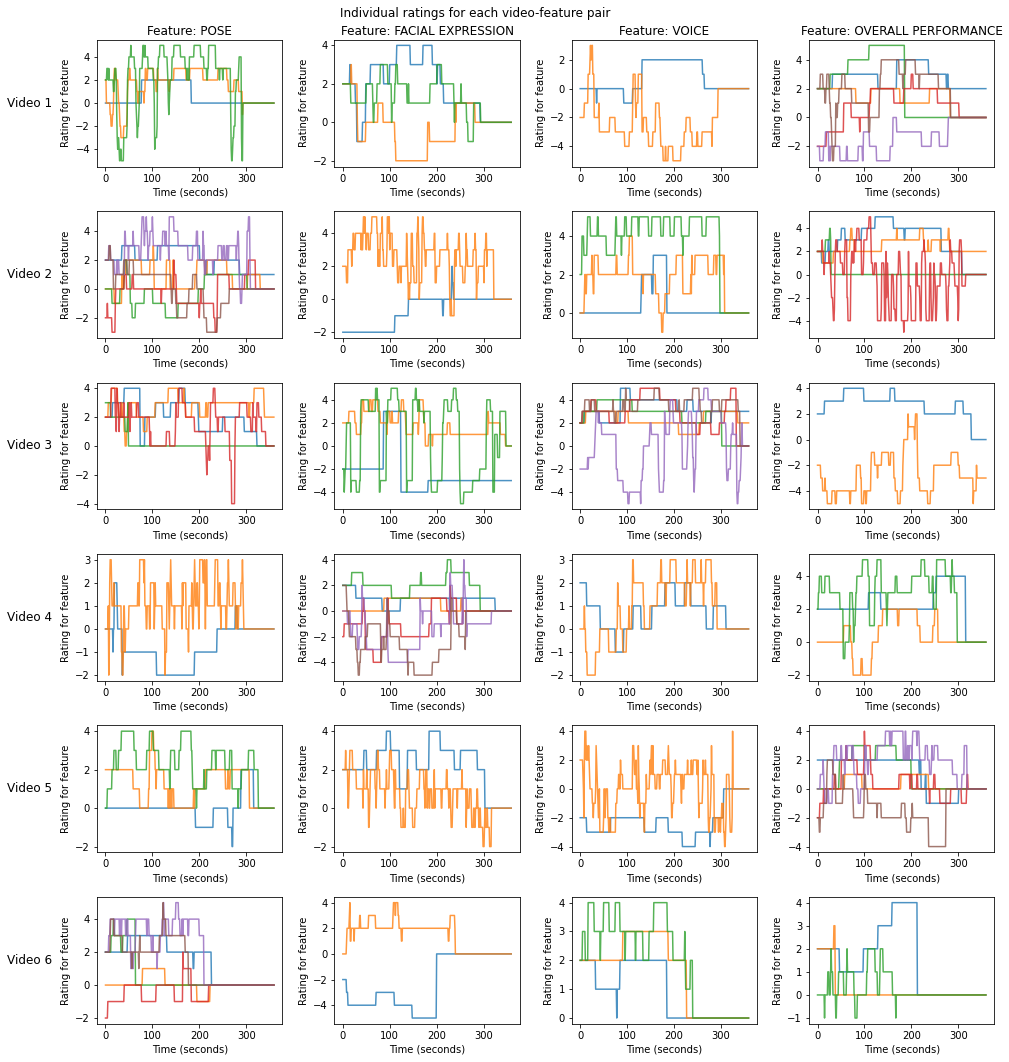

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy


cols = ['Feature: {}'.format(col) for col in features]
rows = ['Video {}'.format(row) for row in range(1, 7)]

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))
plt.setp(axes.flat, xlabel='Time (seconds)', ylabel='Rating for feature')

fig.suptitle('Individual ratings for each video-feature pair')

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()

fig.subplots_adjust(left=0.15, top=0.95)

print(people_in_each_vid_feat)
print(f'{np.sum(people_in_each_vid_feat[1:])} recs out of {NO_VIDEOS * (NO_FEATURES * NO_PEOPLE+1)}')

for v in range(1, NO_VIDEOS):
  for f in range(NO_FEATURES):
    for p in range(6):
      if np.all(ratings_all[v][f][p] == 0):
        continue 
      axes[v-1][f].plot(range(no_ratings), ratings_all[v][f][p], alpha=0.8)

plt.show()


In [ ]:
# ratings_all = np.zeros((NO_VIDEOS, NO_FEATURES, NO_PEOPLE+2, no_ratings))
# print(ratings_all.shape)
import pandas as pd

ratings_std = np.zeros((NO_VIDEOS, NO_FEATURES, no_ratings))
ratings_mean = np.zeros((NO_VIDEOS, NO_FEATURES, no_ratings))

for v in range(NO_VIDEOS):
  for f in range(NO_FEATURES):
    idx=[]
    for p in range(6):
      if not np.all(ratings_all[v][f][p] == 0):
        idx.append(p)

    s = len(idx)    
    df = pd.DataFrame(ratings_all[v][f].T)
    df_cor = df.corr(method ='pearson')
    np.fill_diagonal(df_cor.values, 0.)
    df_cor_sum = df_cor.sum(0)
    df_cor_sum/=(s-1) 
    print(df_cor_sum) 
    
    ratings_mean[v][f] = df_cor_sum.T @ ratings_all[v][f]
    print(ratings_mean[v][f].shape)

[[2. 2. 1. 4.]
 [3. 3. 2. 6.]
 [6. 2. 3. 4.]
 [4. 3. 6. 2.]
 [2. 6. 3. 3.]
 [3. 2. 2. 6.]
 [6. 2. 3. 3.]]
85.0 recs out of 119


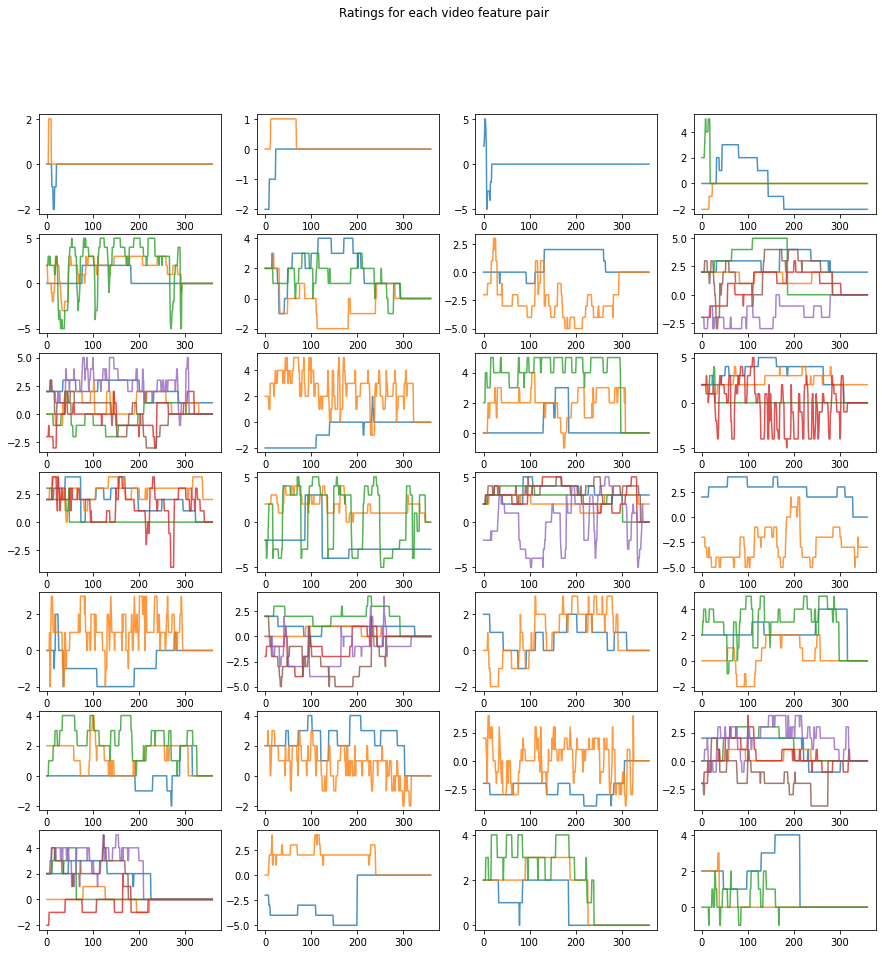

In [ ]:
fig, plots = plt.subplots(NO_VIDEOS, NO_FEATURES, figsize=(15,15))
fig.suptitle('Ratings for each video feature pair')

print(people_in_each_vid_feat)
print(f'{np.sum(people_in_each_vid_feat[1:])} recs out of {NO_VIDEOS * (NO_FEATURES * NO_PEOPLE+1)}')

for v in range(NO_VIDEOS):
  for f in range(NO_FEATURES):
    for p in range(6):
      if np.all(ratings_all[v][f][p] == 0):
        continue 
      plots[v][f].plot(range(no_ratings), ratings_all[v][f][p], alpha=0.8)

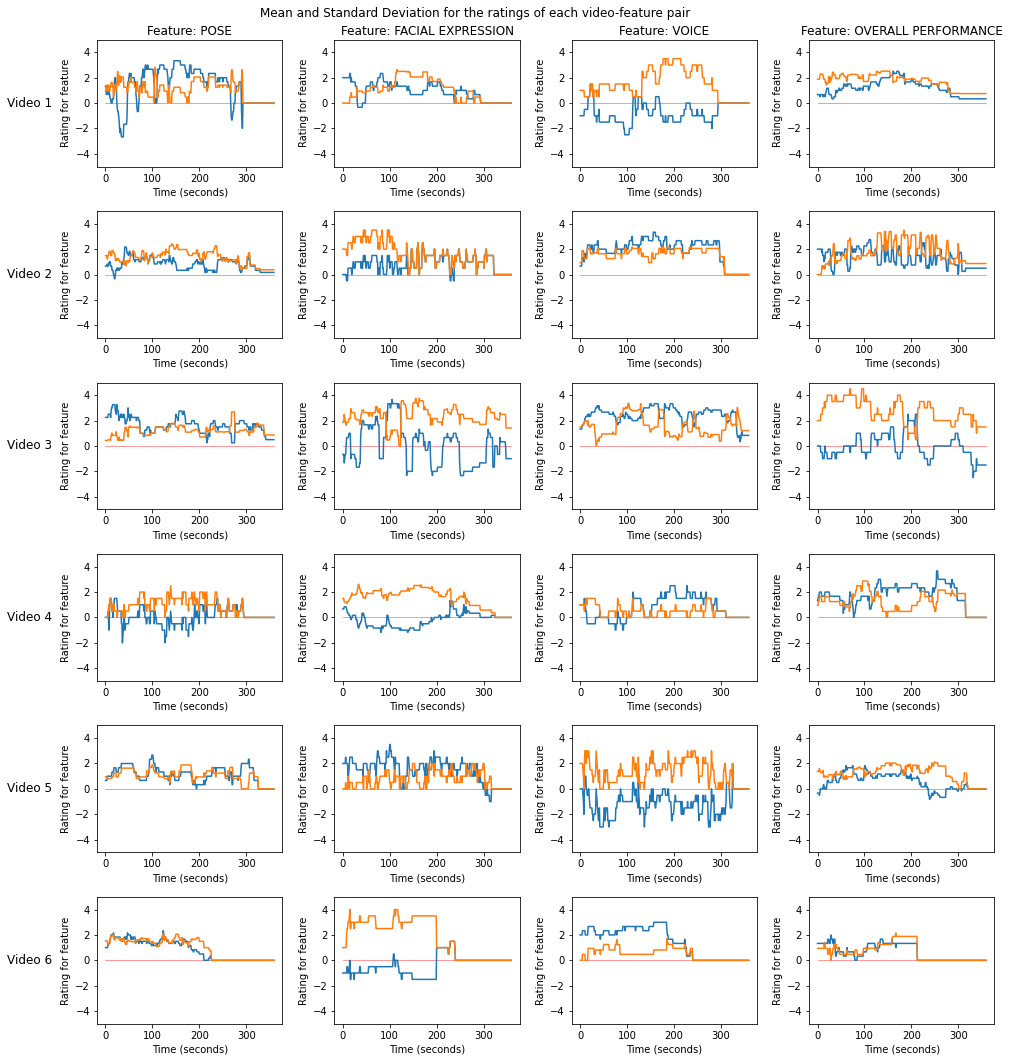

In [ ]:
cols = ['Feature: {}'.format(col) for col in features]
rows = ['Video {}'.format(row) for row in range(1, 7)]

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))
plt.setp(axes.flat, xlabel='Time (seconds)', ylabel='Rating for feature')

fig.suptitle('Mean and Standard Deviation for the ratings of each video-feature pair')


ratings_std = np.zeros((NO_VIDEOS, NO_FEATURES, no_ratings))
ratings_mean_2 = np.zeros((NO_VIDEOS, NO_FEATURES, no_ratings))

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()

fig.subplots_adjust(left=0.15, top=0.95)

for v in range(1, NO_VIDEOS):
  for f in range(NO_FEATURES):
    rating = np.zeros_like(ratings_all[v][f][0])
    ratings_no = 0
    axes[v-1][f].plot(range(no_ratings), rating, color = 'red', linewidth=0.8, alpha=0.5)
    idx = []

    for p in range(6):
      if not np.all(ratings_all[v][f][p] == 0):
        idx.append(p)

    ratings_mean[v][f] = np.mean((ratings_all[v][f])[idx], axis=0)
    ratings_std[v][f] = np.std((ratings_all[v][f])[idx], axis=0)
 
    axes[v-1][f].plot(range(no_ratings), ratings_mean[v][f])
    axes[v-1][f].plot(range(no_ratings), ratings_std[v][f])
    axes[v-1][f].set_ylim([-5, 5])

np.save("ratings", ratings_mean)
np.save("ratings_std_dev", ratings_std)

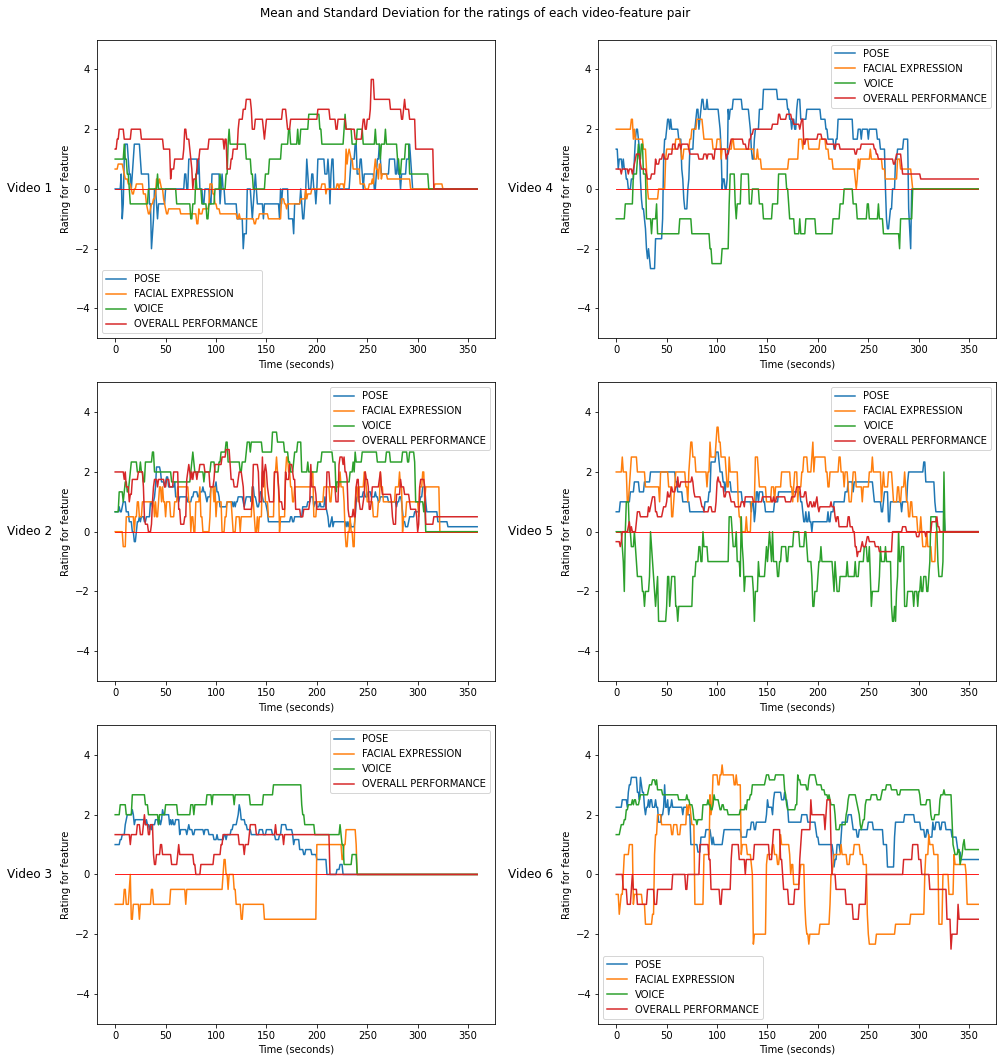

In [ ]:
col = ["Overlapping mean scores for each modality"]
rows = ['Video {}'.format(row) for row in range(1, 7)]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.setp(axes.flat, xlabel='Time (seconds)', ylabel='Rating for feature')

fig.suptitle('Mean and Standard Deviation for the ratings of each video-feature pair')

ratings_std = np.zeros((NO_VIDEOS, NO_FEATURES, no_ratings))
ratings_mean_2 = np.zeros((NO_VIDEOS, NO_FEATURES, no_ratings))

pad = 5 # in points

# for i, ax in enumerate(axes[0]):
#     ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
#                 xycoords='axes fraction', textcoords='offset points',
#                 size='large', ha='center', va='baseline')

for ax, row in zip(axes.T.flatten(), rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()

fig.subplots_adjust(left=0.15, top=0.95)

for v in range(1, NO_VIDEOS):
  for f in range(NO_FEATURES):
    rating = np.zeros_like(ratings_all[v][f][0])
    ratings_no = 0
    axes[(v-1)%3][1-(v-1)%2].plot(range(no_ratings), rating, color = 'red', linewidth=0.8, alpha=0.5)
    idx = []

    for p in range(6):
      if not np.all(ratings_all[v][f][p] == 0):
        idx.append(p)

    ratings_mean[v][f] = np.mean((ratings_all[v][f])[idx], axis=0)
    # ratings_std[v][f] = np.std((ratings_all[v][f])[idx], axis=0)
 
    axes[(v-1)%3][1-(v-1)%2].plot(range(no_ratings), ratings_mean[v][f], label=features[f])
    # axes[v-1][0].plot(range(no_ratings), ratings_std[v][f])
    axes[(v-1)%3][1-(v-1)%2].set_ylim([-5, 5])

    axes[(v-1)%3][1-(v-1)%2].legend()    

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


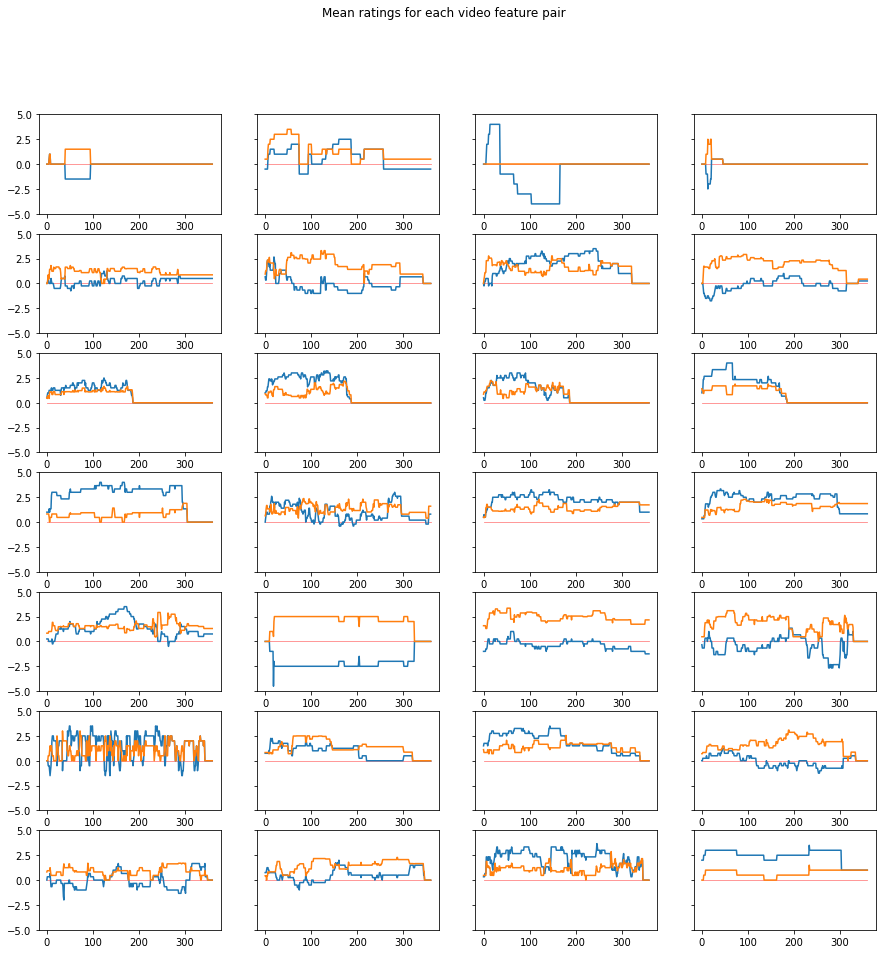

In [ ]:
fig, plots = plt.subplots(NO_VIDEOS, NO_FEATURES, figsize=(15,15), sharey=True)
fig.suptitle('Mean and Standard Deviation for the ratings of each video-feature pair')

ratings_std = np.zeros((NO_VIDEOS, NO_FEATURES, no_ratings))
ratings_mean_2 = np.zeros((NO_VIDEOS, NO_FEATURES, no_ratings))

for v in range(NO_VIDEOS):
  for f in range(NO_FEATURES):
    rating = np.zeros_like(ratings_all[v][f][0])
    ratings_no = 0
    plots[v][f].plot(range(no_ratings), rating, color = 'red', linewidth=0.8, alpha=0.5)
    idx = []

    for p in range(6):
      if not np.all(ratings_all[v][f][p] == 0):
        idx.append(p)

    ratings_mean[v][f] = np.mean((ratings_all[v][f])[idx], axis=0)
    ratings_std[v][f] = np.std((ratings_all[v][f])[idx], axis=0)
    
    print(np.all(ratings_std[v][f]>=0))

    plots[v][f].plot(range(no_ratings), ratings_mean[v][f])
    plots[v][f].plot(range(no_ratings), ratings_std[v][f])
    plots[v][f].set_ylim([-5, 5])

np.save("ratings", ratings_mean)
np.save("ratings_std_dev", ratings_std)


In [ ]:
import pandas as pd